In [95]:
# !conda install pandas=0.19.2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
import math

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# drop the id field
print(data.isnull().values.any())
data=data.drop(["id"], axis=1) # del data["id"]

False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.3+ MB


In [43]:
continuous = ["bedrooms", "floors", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"]
categorical=["condition", "waterfront", "view", "grade"]

In [7]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [9]:
data.isnull().values.any() # check for null values

False

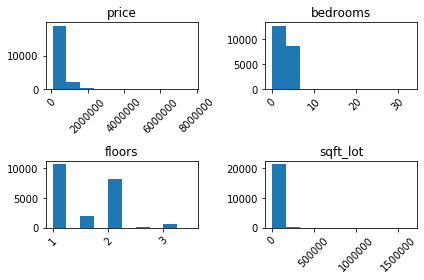

In [10]:
# plot histograms of each column to analyse the data
fig, axs=plt.subplots(2,2)
axs = axs.ravel()
cols = ['price', 'bedrooms', 'floors', 'sqft_lot']
i=0
for idx, ax in enumerate(axs):
    ax.hist(data[cols[i]])
    ax.set_title(cols[i])
    ax.tick_params(axis='x',labelrotation=45)
    i+=1
plt.tight_layout()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.3+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d8589290>,
      dtype=object)

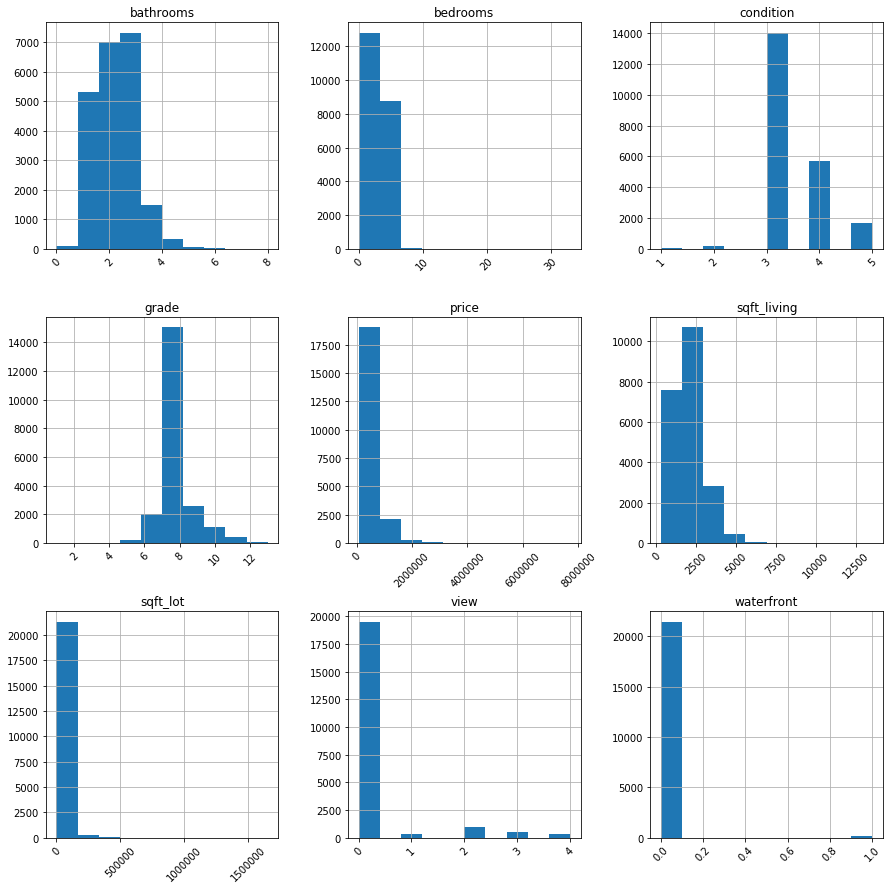

In [12]:
# PLOT HISTOGRAMS
data.hist(column=['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade'], xrot=45, figsize=(15, 15))

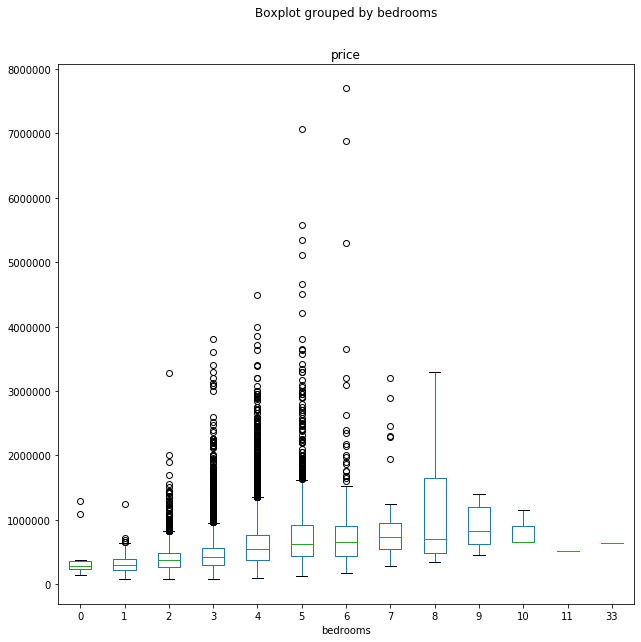

In [13]:
# BOXPLOT -- visualizing relationship between bedrooms and price.
data.boxplot(by="bedrooms", column=["price"], grid=False, figsize=(10, 10))

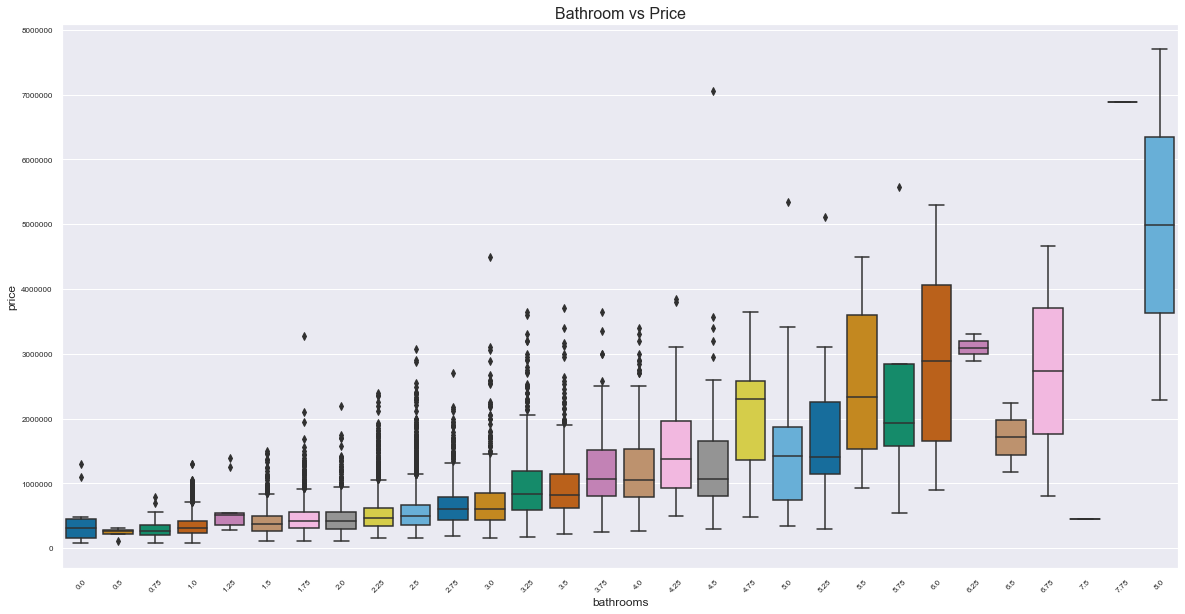

In [14]:
# BOXPLOT -- visualizing relationship between bathrooms and price.
sns.set(rc={'figure.figsize': (20, 10)})
bxplt=sns.boxplot(x="bathrooms", y="price", data=data, palette="colorblind")
plt.xticks(rotation=45)
bxplt.axes.set_title("Bathroom vs Price", fontsize=16)
bxplt.tick_params(labelsize=8)

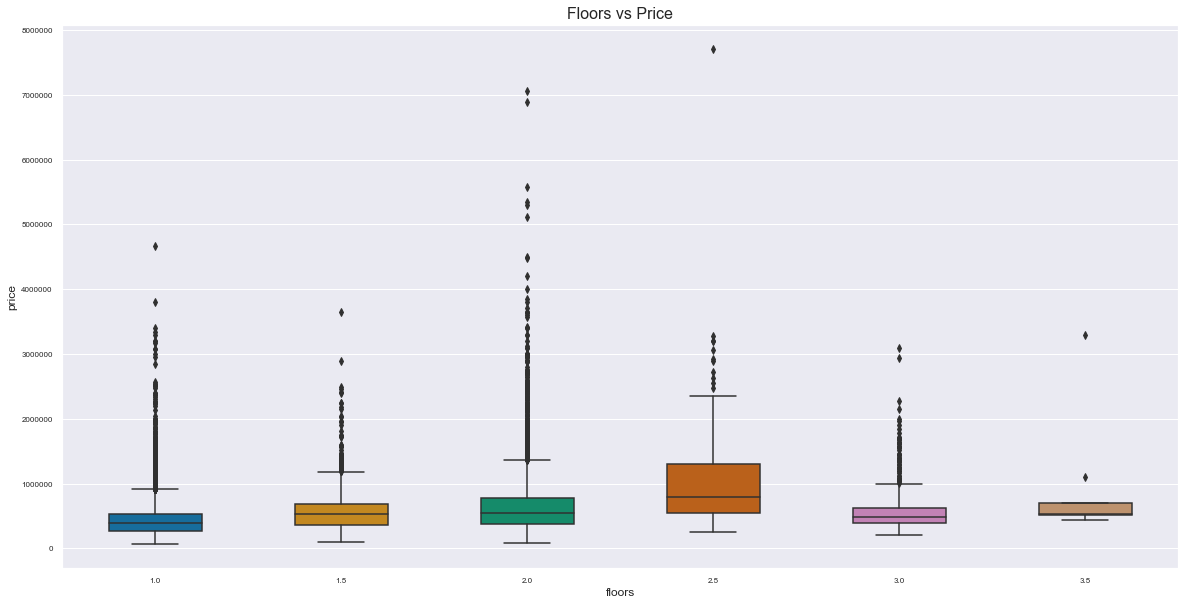

In [15]:
# BOXPLOT -- visualizing relationship between floors and price.
sns.set(rc={'figure.figsize': (20, 10)})
bxplt=sns.boxplot(x="floors", y="price", data=data, palette="colorblind", width=0.5)
bxplt.axes.set_title("Floors vs Price", fontsize=16)
bxplt.tick_params(labelsize=8)

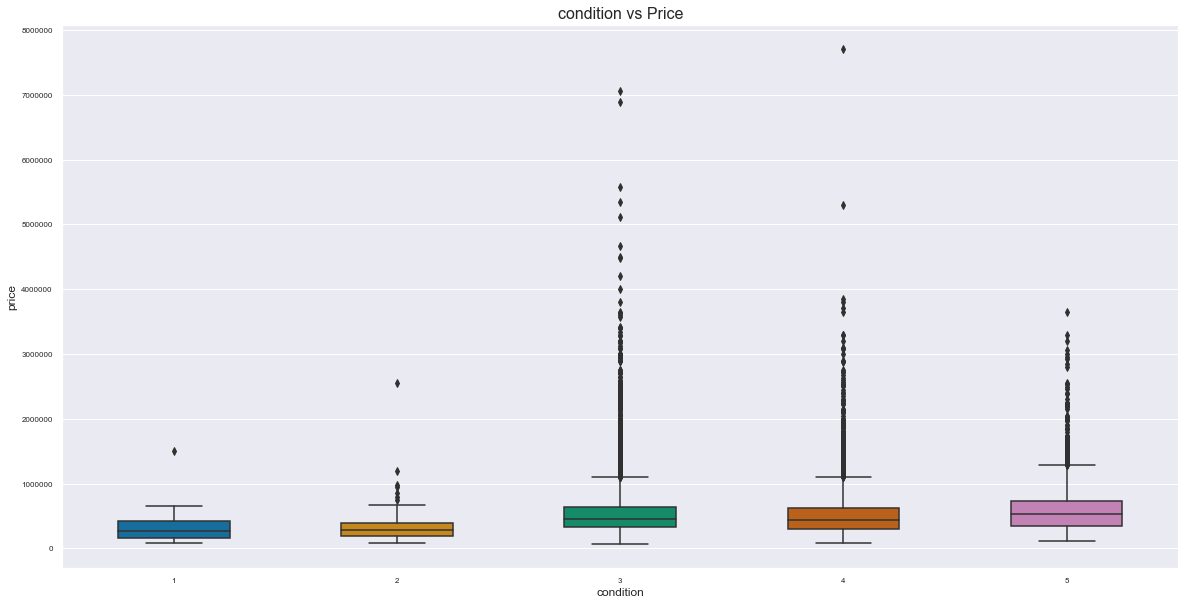

In [16]:
'''
Categorical variables vs Target
'''
# BOXPLOT -- visualizing relationship between floors and price.
categorical=["condition", "waterfront", "view", "grade"]


sns.set(rc={'figure.figsize': (20, 10)})
bxplt=sns.boxplot(x=categorical[0], y="price", data=data, palette="colorblind", width=0.5)
bxplt.axes.set_title(categorical[0]+" vs Price", fontsize=16)
bxplt.tick_params(labelsize=8)

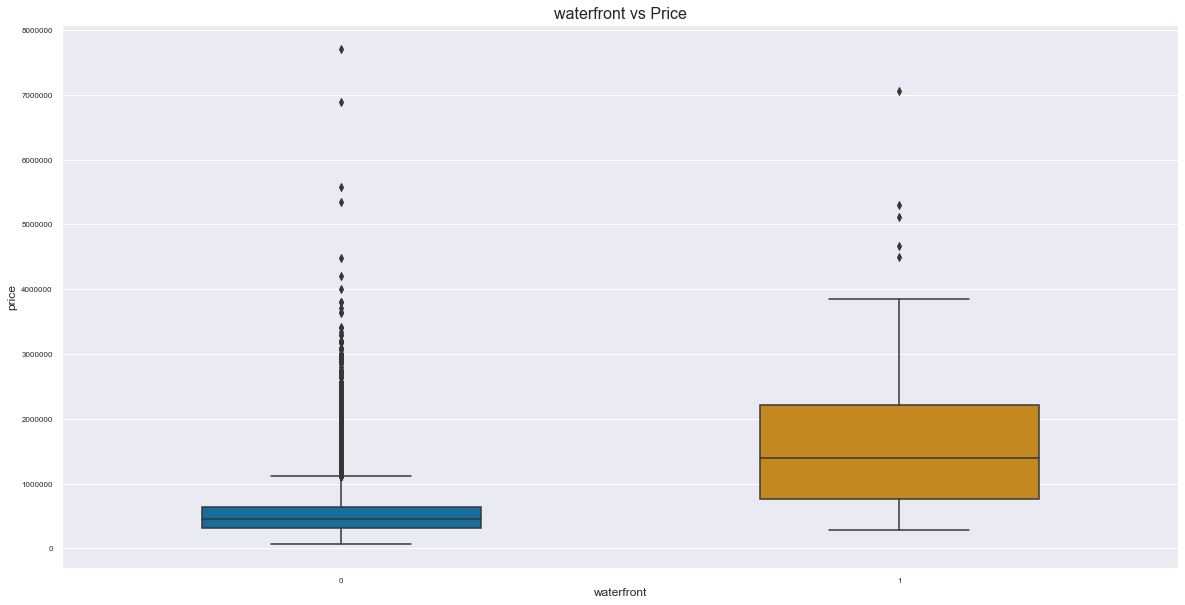

In [17]:
sns.set(rc={'figure.figsize': (20, 10)})
bxplt=sns.boxplot(x=categorical[1], y="price", data=data, palette="colorblind", width=0.5)
bxplt.axes.set_title(categorical[1]+" vs Price", fontsize=16)
bxplt.tick_params(labelsize=8)

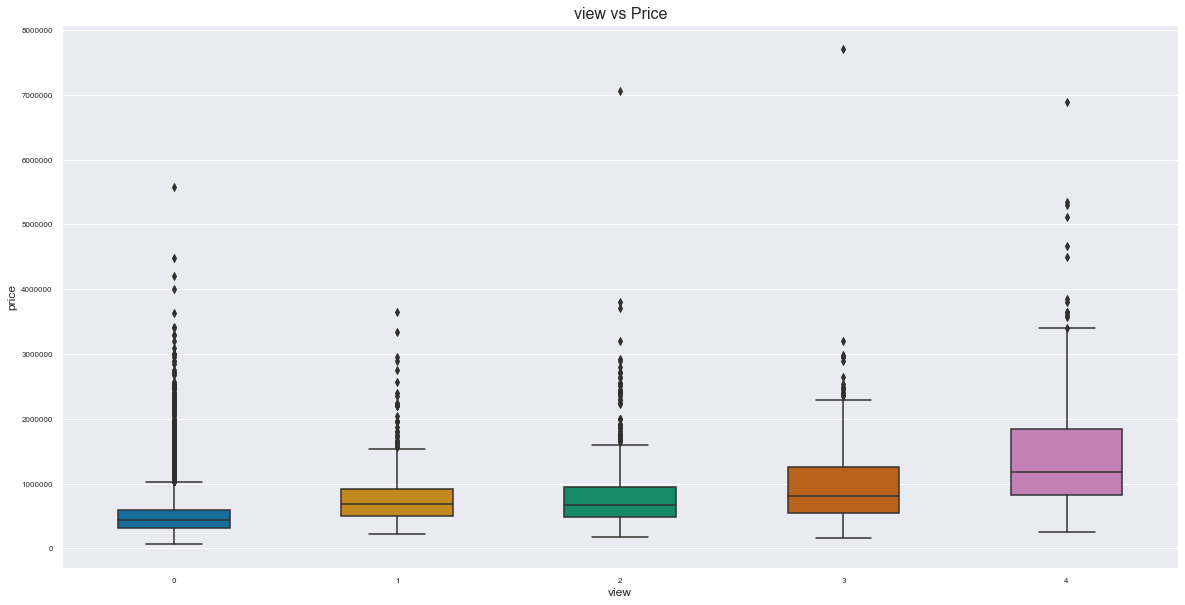

In [18]:
sns.set(rc={'figure.figsize': (20, 10)})
bxplt=sns.boxplot(x=categorical[2], y="price", data=data, palette="colorblind", width=0.5)
bxplt.axes.set_title(categorical[2]+" vs Price", fontsize=16)
bxplt.tick_params(labelsize=8)

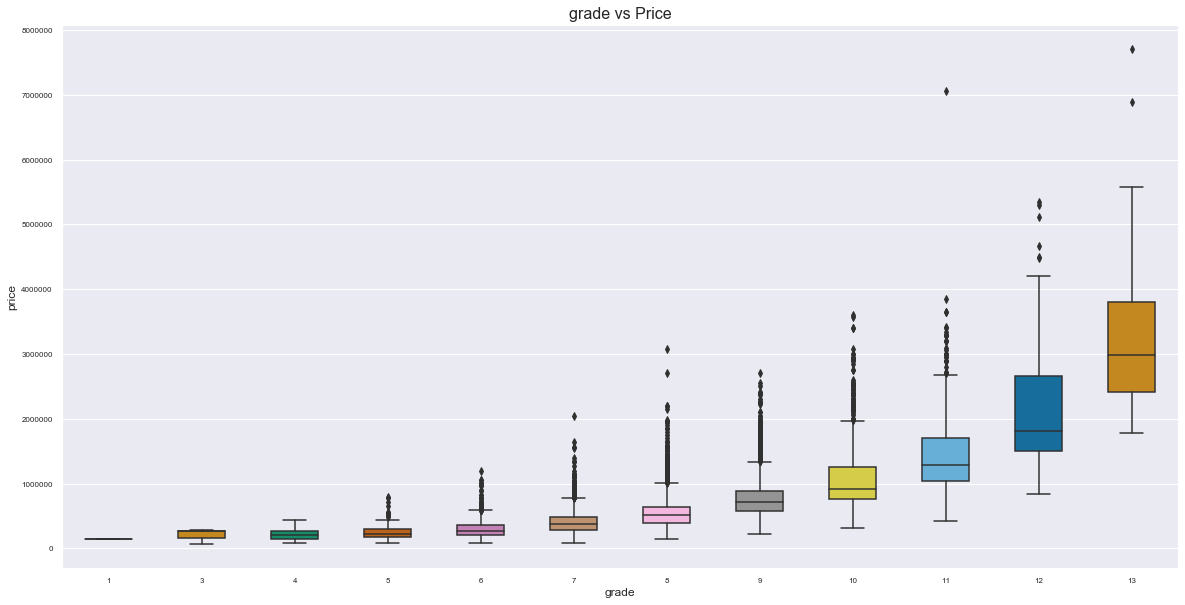

In [19]:
sns.set(rc={'figure.figsize': (20, 10)})
bxplt=sns.boxplot(x=categorical[3], y="price", data=data, palette="colorblind", width=0.5)
bxplt.axes.set_title(categorical[3]+" vs Price", fontsize=16)
bxplt.tick_params(labelsize=8)

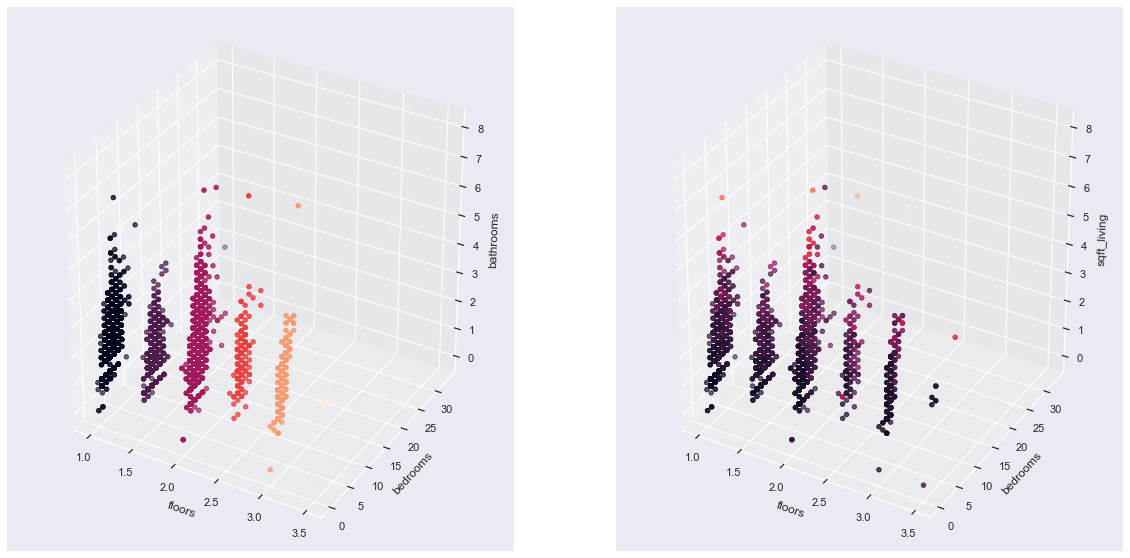

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(data["floors"], data["bedrooms"], data["bathrooms"], c=data["floors"])
ax.set_xlabel("floors")
ax.set_ylabel("bedrooms")
ax.set_zlabel("bathrooms")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(data["floors"], data["bedrooms"], data["bathrooms"], c=data["sqft_living"])
ax.set_xlabel("floors")
ax.set_ylabel("bedrooms")
ax.set_zlabel("sqft_living")
plt.show()

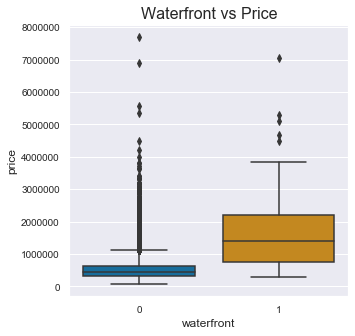

In [21]:
sns.set(rc={'figure.figsize': (5,5)})
bxplt=sns.boxplot(x="waterfront", y="price", data=data, palette="colorblind")
# plt.xticks(rotation=45)
bxplt.axes.set_title("Waterfront vs Price", fontsize=16)
bxplt.tick_params(labelsize=10)

Text(0.5, 1.0, 'View vs Price')

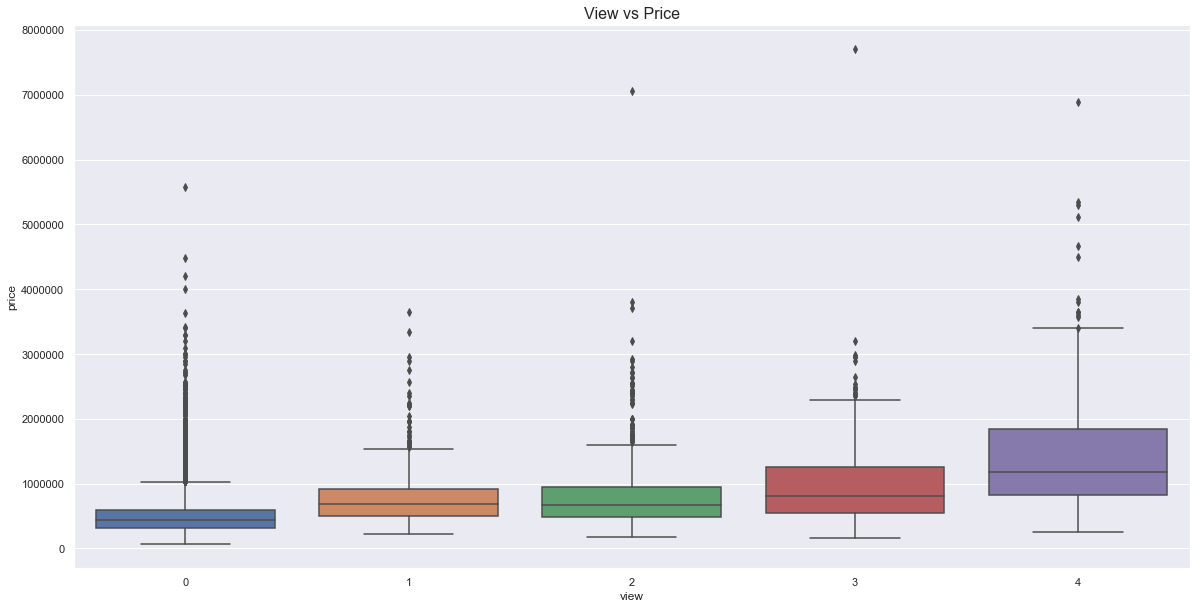

In [22]:
sns.set(rc={'figure.figsize':(20,10)})
bxplt=sns.boxplot(x="view", y="price", data=data)
bxplt.axes.set_title("View vs Price", fontsize=16)

Text(0.5, 1.0, 'Grade vs Price')

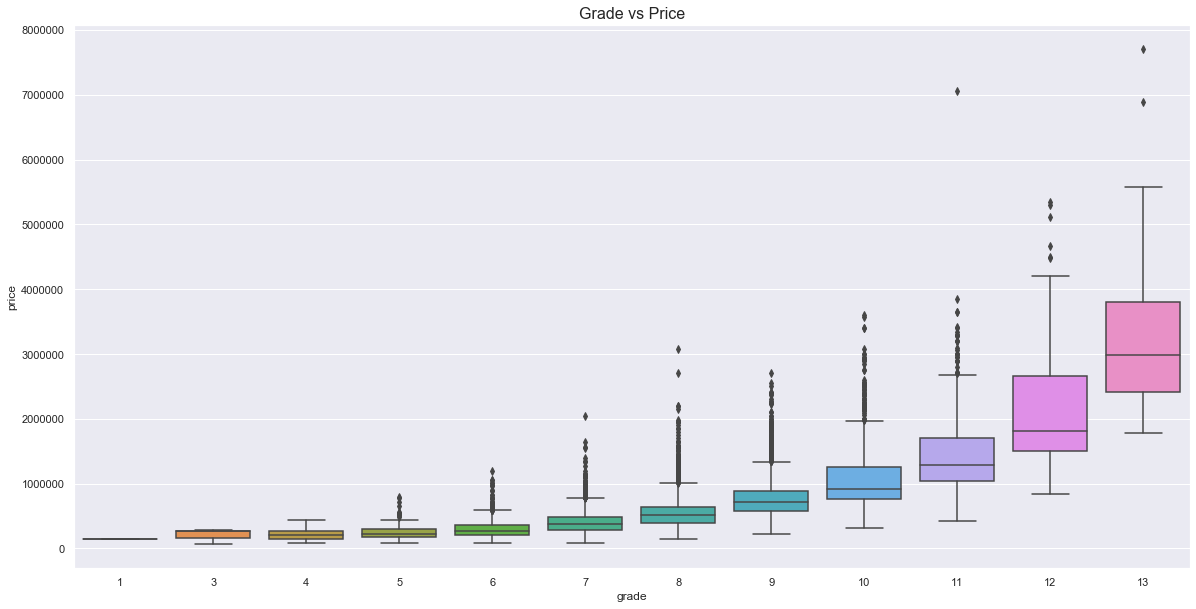

In [23]:
sns.set(rc={'figure.figsize': (20, 10)})
bxplt = sns.boxplot(x="grade",y="price",data=data)
bxplt.axes.set_title("Grade vs Price", fontsize=16)

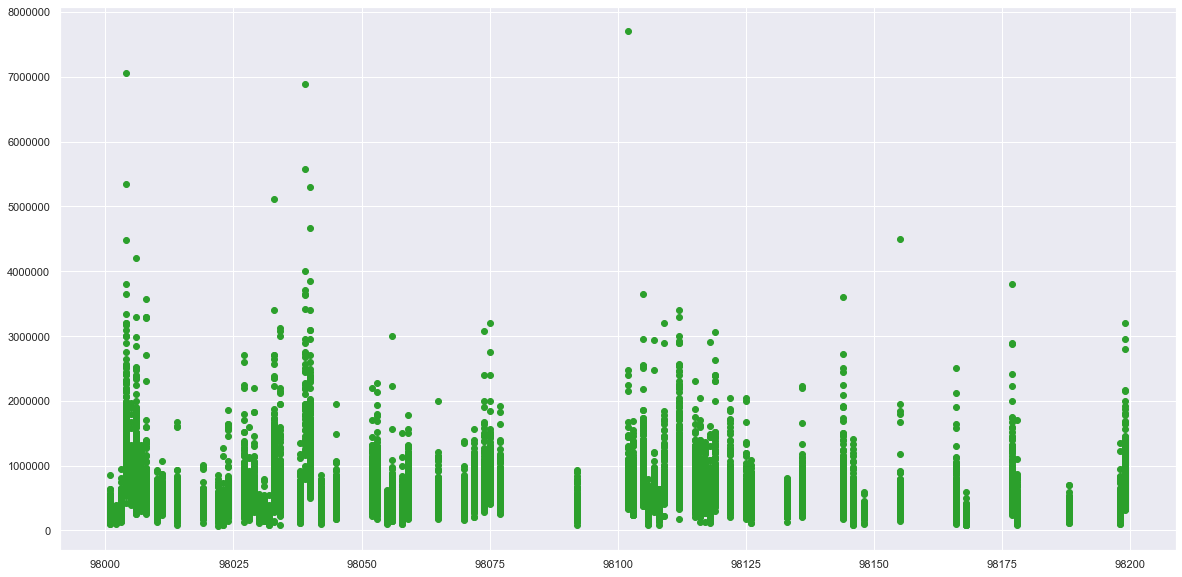

In [24]:
plt.scatter(data['zipcode'], data['price'], c='#2ca02c')

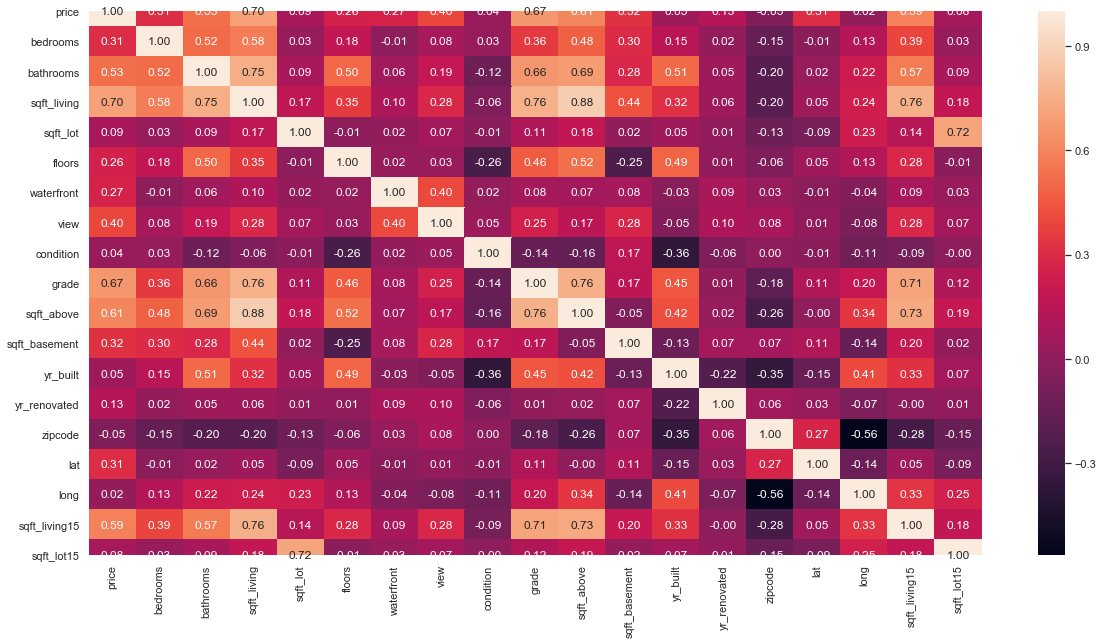

In [25]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.3+ MB


In [27]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
data["long"] = data["long"].apply(lambda x: -1*(x-data["long"].mean()))

In [29]:
data["long"].describe()

count    2.161300e+04
mean     6.446098e-13
std      1.408283e-01
min     -8.988964e-01
25%     -8.889640e-02
50%      1.610360e-02
75%      1.141036e-01
max      3.051036e-01
Name: long, dtype: float64

In [48]:
def zip2code(zipcode):
    if zipcode <= 98042:
        return 0
    elif 98042 < zipcode <=98084:
        return 1
    elif 98072 < zipcode <= 98150:
        return 2
    else:
        return 3

In [49]:
data["area"]=data["zipcode"].apply(lambda x: zip2code(x))

In [50]:
data["area"]

0        3
1        2
2        0
3        2
4        1
        ..
21608    2
21609    2
21610    2
21611    0
21612    2
Name: area, Length: 21613, dtype: int64

In [33]:
# modify the date 
data['datetime']=pd.to_datetime(data['date'])

In [34]:
data['datetime']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: datetime, Length: 21613, dtype: datetime64[ns]

In [35]:
min_date=min(data['datetime'])
def get_interval(date):
    return int(str(date-min_date).split()[0])

In [36]:
data['date_interval']=data['datetime'].apply(lambda x: get_interval(x))

In [44]:
columns = ['date_interval', 'long', 'area'] + continuous + categorical

In [53]:
# split the dataframe into train and val
print("Length of dataframe: ", len(data))
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
print("Length of training dataframe: ", len(train))
print("Length of testing dataframe: ", len(test))

Length of dataframe:  21613
Length of training dataframe:  17176
Length of testing dataframe:  4437


In [61]:
# create labels
x_train, x_test = train[columns], test[columns]
y_train, y_test = train['price'], test['price']

In [62]:
x_train

,date_interval,long,area,bedrooms,floors,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,condition,waterfront,view,grade
1,221,0.105104,2,3,2.0,2.25,2570,7242,2170,400,1951,1991,1690,7639,3,0,0,7
2,299,0.019104,0,2,1.0,1.00,770,10000,770,0,1933,0,2720,8062,3,0,0,6
3,221,0.179104,2,4,1.0,3.00,1960,5000,1050,910,1965,0,1360,5000,5,0,0,7
4,292,-0.168896,1,3,1.0,2.00,1680,8080,1680,0,1987,0,1800,7503,3,0,0,8
5,10,-0.208896,1,4,1.0,4.50,5420,101930,3890,1530,2001,0,4760,101930,3,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,269,0.074104,2,3,3.0,2.00,1490,1126,1490,0,2014,0,1400,1230,3,0,0,8
21606,328,0.184104,2,4,2.0,3.50,3510,7200,2600,910,2009,0,2050,6200,3,0,0,9
21609,297,0.148104,2,4,2.0,2.50,2310,5813,2310,0,2014,0,1830,7200,3,0,0,8
21610,52,0.085104,2,2,2.0,0.75,1020,1350,1020,0,2009,0,1020,2007,3,0,0,7


In [63]:
# using linear regression
regressor = LinearRegression()
regressor.fit(x_train, y_train) # train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_pred=regressor.predict(x_test)
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  212758.6209220988


In [86]:
# using linear regression
pipe = Pipeline([
        ('sc', StandardScaler()),  
        ('poly', PolynomialFeatures(include_bias=True)),
        ('reg', LinearRegression())
    ])
regressor = GridSearchCV(pipe, param_grid={'poly__degree':[2,3]})
regressor.fit(x_train, y_train) # train
print(regressor.best_params_)
y_pred=regressor.predict(x_test)
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

/Users/damanpreetkaur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'poly__degree': 2}
RMSE:  187286.1916510834


/Users/damanpreetkaur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [93]:
# # using linear regression
# pipe = Pipeline([
#         ('sc', StandardScaler()),  
#         ('poly', PolynomialFeatures(include_bias=True)),
#         ('reg', Lasso(alpha=0.01, fit_intercept=True))
#     ])
regressor = Lasso(alpha=0.001, fit_intercept=True)
regressor.fit(x_train, y_train) # train
y_pred=regressor.predict(x_test)
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  212758.62051270268


/Users/damanpreetkaur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312956498323280.25, tolerance: 230110197229.2025
  positive)


In [97]:
# L2 - regularization
regressor = Ridge(alpha=0.01, fit_intercept=True)
regressor.fit(x_train, y_train) # train
y_pred=regressor.predict(x_test)
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  212758.56851014786
